This notebook contains my notebook code for the supervised learning task of the FlexiSAF final project, I chose the Podcast Listening dataset from kaggle, which contains data on different podcasts and the average listening time they were listened to for.

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor as XGBR
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv", index_col=0)#the train dataset

In [3]:
train.shape

(750000, 11)

In [4]:
train.head()

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
id,,,,,,,,,,,
0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [5]:
train.columns

Index(['Podcast_Name', 'Episode_Title', 'Episode_Length_minutes', 'Genre',
       'Host_Popularity_percentage', 'Publication_Day', 'Publication_Time',
       'Guest_Popularity_percentage', 'Number_of_Ads', 'Episode_Sentiment',
       'Listening_Time_minutes'],
      dtype='object')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 0 to 749999
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Podcast_Name                 750000 non-null  object 
 1   Episode_Title                750000 non-null  object 
 2   Episode_Length_minutes       662907 non-null  float64
 3   Genre                        750000 non-null  object 
 4   Host_Popularity_percentage   750000 non-null  float64
 5   Publication_Day              750000 non-null  object 
 6   Publication_Time             750000 non-null  object 
 7   Guest_Popularity_percentage  603970 non-null  float64
 8   Number_of_Ads                749999 non-null  float64
 9   Episode_Sentiment            750000 non-null  object 
 10  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), object(6)
memory usage: 68.7+ MB


In [7]:
train.describe()

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,662907.000000,750000.000000,603970.000000,749999.000000,750000.000000
mean,64.504738,59.859901,52.236449,1.348855,45.437406
std,32.969603,22.873098,28.451241,1.151130,27.138306
min,0.000000,1.300000,0.000000,0.000000,0.000000
25%,35.730000,39.410000,28.380000,0.000000,23.178350
50%,63.840000,60.050000,53.580000,1.000000,43.379460
75%,94.070000,79.530000,76.600000,2.000000,64.811580
max,325.240000,119.460000,119.910000,103.910000,119.970000


In [8]:
{col_name: train[col_name].value_counts().shape[0] for col_name in ["Podcast_Name", "Episode_Title", "Genre"]}

{'Podcast_Name': 48, 'Episode_Title': 100, 'Genre': 10}

In [9]:
#from the above we see that the podcast name, genres and titles are not unique identifiers

In [10]:
train.groupby(["Podcast_Name", "Genre"]).size().unstack()

Genre,Business,Comedy,Education,Health,Lifestyle,Music,News,Sports,Technology,True Crime
Podcast_Name,,,,,,,,,,
Athlete's Arena,4.0,21.0,9.0,5.0,3.0,5.0,11.0,17256.0,5.0,8.0
Brain Boost,NaN,5.0,11504.0,5.0,1.0,6.0,3.0,2.0,14.0,3.0
Business Briefs,17004.0,2.0,NaN,1.0,NaN,NaN,NaN,2.0,3.0,NaN
Business Insights,19471.0,1.0,1.0,NaN,1.0,NaN,3.0,1.0,NaN,2.0
Comedy Corner,NaN,15924.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN
Crime Chronicles,1.0,1.0,3.0,4.0,12.0,4.0,5.0,5.0,3.0,17336.0
Criminal Minds,4.0,4.0,7.0,1.0,6.0,3.0,7.0,5.0,1.0,17697.0
Current Affairs,6.0,8.0,NaN,2.0,1.0,6.0,13086.0,9.0,3.0,17.0
Daily Digest,2.0,5.0,NaN,4.0,4.0,1.0,13357.0,12.0,2.0,4.0


In [11]:
train.isnull().sum() # we have some columns with null value

,0
Podcast_Name,0
Episode_Title,0
Episode_Length_minutes,87093
Genre,0
Host_Popularity_percentage,0
Publication_Day,0
Publication_Time,0
Guest_Popularity_percentage,146030
Number_of_Ads,1
Episode_Sentiment,0


<Axes: ylabel='id'>

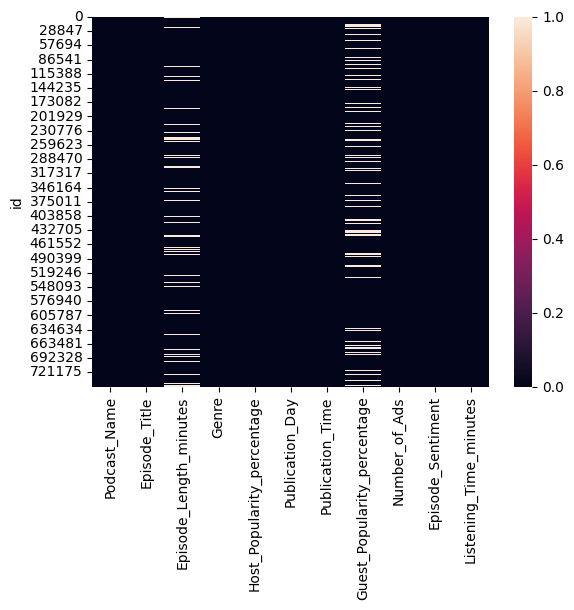

In [12]:
sns.heatmap(train.isnull())

In [13]:
num_names = [i for i in train.columns if train[i].dtype == np.float64]

In [14]:
train[num_names].corr() #corellation matrix for the numerical values

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
Episode_Length_minutes,1.000000,0.023596,-0.009704,-0.054953,0.916749
Host_Popularity_percentage,0.023596,1.000000,0.022431,-0.017896,0.050870
Guest_Popularity_percentage,-0.009704,0.022431,1.000000,0.007933,-0.016014
Number_of_Ads,-0.054953,-0.017896,0.007933,1.000000,-0.118337
Listening_Time_minutes,0.916749,0.050870,-0.016014,-0.118337,1.000000


In [15]:
train[num_names]

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
id,,,,,
0,NaN,74.81,NaN,0.0,31.41998
1,119.80,66.95,75.95,2.0,88.01241
2,73.90,69.97,8.97,0.0,44.92531
3,67.17,57.22,78.70,2.0,46.27824
4,110.51,80.07,58.68,3.0,75.61031
...,...,...,...,...,...
749995,75.66,69.36,NaN,0.0,56.87058
749996,75.75,35.21,NaN,2.0,45.46242
749997,30.98,78.58,84.89,0.0,15.26000


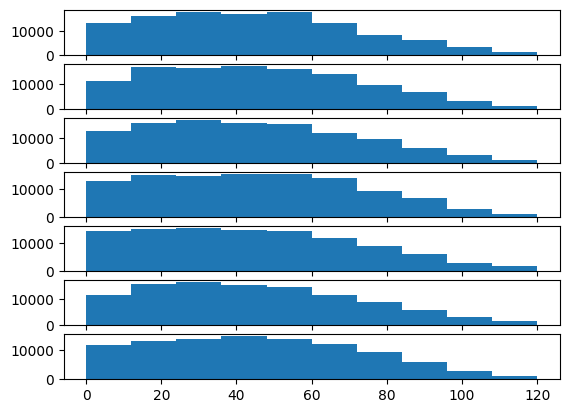

In [16]:
_, axes = plt.subplots(7,1)
keys = train['Publication_Day'].value_counts().keys()
for i in range(7):
  axes[i].hist(train[train['Publication_Day'] == keys[i]]['Listening_Time_minutes'])
  #shows a consistent distribution for litening_time of podcasts published on different days

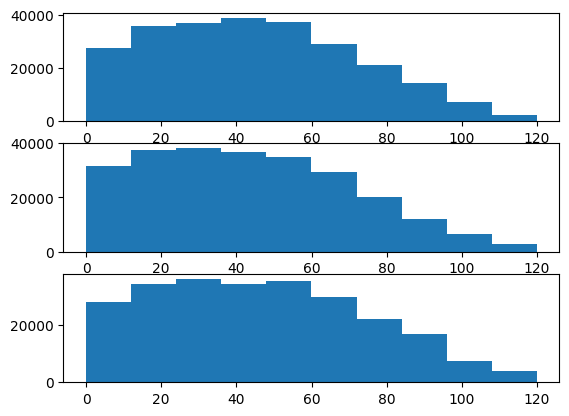

In [17]:
_, axes = plt.subplots(3,1)
count = train["Episode_Sentiment"].value_counts()
for i in range(3):
  axes[i].hist(train[train['Episode_Sentiment'] == train["Episode_Sentiment"].value_counts().keys()[i]]['Listening_Time_minutes'])
  #shows a consistent distribution for litening_time of podcasts with different sentiments

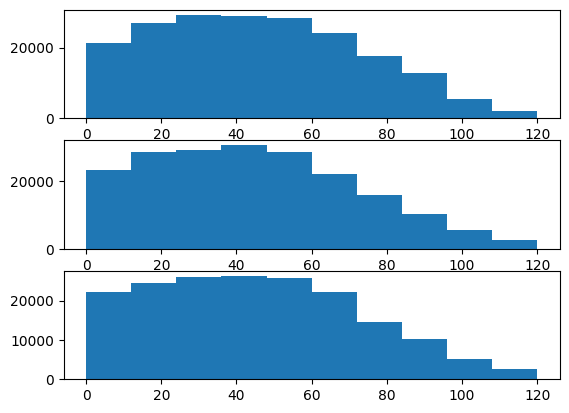

In [18]:
_, axes = plt.subplots(3,1)
keys = train["Publication_Time"].value_counts().keys()
for i in range(3):
  axes[i].hist(train[train["Publication_Time"] == keys[i]]['Listening_Time_minutes'])
    #shows a consistent distribution for litening_time of podcasts published at different times

In [19]:
train.columns

Index(['Podcast_Name', 'Episode_Title', 'Episode_Length_minutes', 'Genre',
       'Host_Popularity_percentage', 'Publication_Day', 'Publication_Time',
       'Guest_Popularity_percentage', 'Number_of_Ads', 'Episode_Sentiment',
       'Listening_Time_minutes'],
      dtype='object')

In [20]:
train["Episode_Title"].value_counts()

,count
Episode_Title,
Episode 71,10515
Episode 62,10373
Episode 31,10292
Episode 61,9991
Episode 69,9864
...,...
Episode 2,5134
Episode 25,5117
Episode 41,4965


(array([6.4173e+04, 6.4605e+04, 6.6136e+04, 6.9694e+04, 8.0852e+04,
        7.9215e+04, 7.4038e+04, 8.0551e+04, 2.4697e+04, 9.0000e+00]),
 array([  0.   ,  11.991,  23.982,  35.973,  47.964,  59.955,  71.946,
         83.937,  95.928, 107.919, 119.91 ]),
 <BarContainer object of 10 artists>)

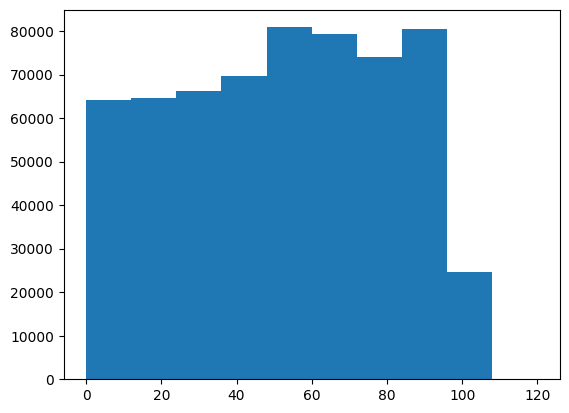

In [21]:
plt.hist(train['Guest_Popularity_percentage'])

(array([9.00000e+00, 3.82960e+04, 1.22208e+05, 1.06799e+05, 1.11603e+05,
        1.14672e+05, 1.13026e+05, 1.06464e+05, 3.69050e+04, 1.80000e+01]),
 array([  1.3  ,  13.116,  24.932,  36.748,  48.564,  60.38 ,  72.196,
         84.012,  95.828, 107.644, 119.46 ]),
 <BarContainer object of 10 artists>)

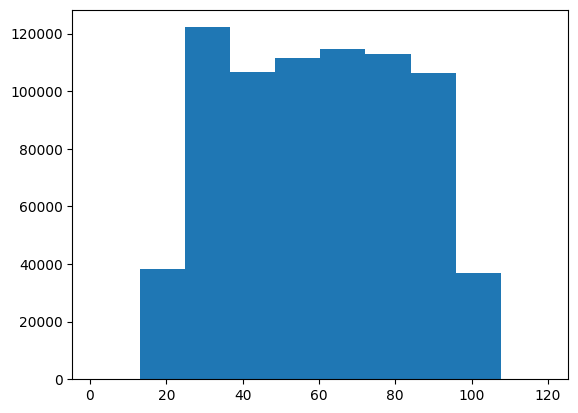

In [22]:
plt.hist(train['Host_Popularity_percentage'])

In [23]:
feature_plan = {i:0 for i in train.columns} #placeholder dict containing my intended strategies for each column

In [24]:
for i in ["Podcast_Name", "Genre", "Publication_Day", 'Publication_Time']:
  feature_plan[i] = "One Hot"

In [25]:
feature_plan["Episode_Title"] = "bin_function"

In [26]:
for i in ['Episode_Length_minutes', 'Host_Popularity_percentage']:
  feature_plan[i] = "scale"

In [27]:
feature_plan["Number_of_Ads"] = "RobustScale"

In [28]:
train[['Guest_Popularity_percentage', 'Listening_Time_minutes']].corr()

,Guest_Popularity_percentage,Listening_Time_minutes
Guest_Popularity_percentage,1.000000,-0.016014
Listening_Time_minutes,-0.016014,1.000000


In [29]:
#filling null values in the guest popularity column with the mode as it's the one that preserves
#corellation the mmost.
train['Guest_Popularity_percentage'].fillna(train['Guest_Popularity_percentage'].mode()).corr(train['Listening_Time_minutes'])

np.float64(-0.016014704533222575)

In [30]:
feature_plan['Guest_Popularity_percentage'] = "fillna(mode), scale"

In [31]:
feature_plan['Episode_Sentiment'] = "ordinal_encode"

In [32]:
#mapping the sentiments to 0,1,2 in order of increasing positivity
sentiment_map = {"Positive": 2, "Neutral": 1, "Negative":0}
train['Episode_Sentiment'].apply(lambda x: sentiment_map[x]).corr(train['Listening_Time_minutes'])

np.float64(0.039469851781523936)

In [33]:
feature_plan

{'Podcast_Name': 'One Hot',
 'Episode_Title': 'bin_function',
 'Episode_Length_minutes': 'scale',
 'Genre': 'One Hot',
 'Host_Popularity_percentage': 'scale',
 'Publication_Day': 'One Hot',
 'Publication_Time': 'One Hot',
 'Guest_Popularity_percentage': 'fillna(mode), scale',
 'Number_of_Ads': 'RobustScale',
 'Episode_Sentiment': 'ordinal_encode',
 'Listening_Time_minutes': 0}

*Here I built the necessary pipelines and builtthe column transformers to be able to transform any instance of the dataset on command*

In [34]:
null_nd_scale = make_pipeline(SimpleImputer(strategy="most_frequent"), StandardScaler(with_mean=True, with_std=True))

In [35]:
def numerize(x):
  return x.apply(lambda f: [int(i[8:10]) for i in f])
num_transfrm = FunctionTransformer(numerize, feature_names_out="one-to-one")
num_scale = make_pipeline(num_transfrm, StandardScaler())

In [36]:
CT = ColumnTransformer([("one-hot", OneHotEncoder(), ["Podcast_Name", "Genre", "Publication_Day", "Publication_Time"]),
                        ("scale", StandardScaler(with_mean=True, with_std=True), ['Host_Popularity_percentage']),
                        ("null_nd_scale", null_nd_scale, ['Episode_Length_minutes', 'Guest_Popularity_percentage']),
                        ("num_nd_scale", num_scale, ["Episode_Title"]),
                        ("encode", make_pipeline(OrdinalEncoder(), StandardScaler()), ["Episode_Sentiment"]),
                        ("Rob_scale", make_pipeline(SimpleImputer(strategy="most_frequent"), RobustScaler()), ['Number_of_Ads'])], remainder = 'drop')
#full column transform

In [37]:
train, test = train_test_split(train, test_size=0.2, shuffle = True)

In [38]:
Y = train['Listening_Time_minutes']

In [39]:
CT.fit(train)

ColumnTransformer(transformers=[('one-hot', OneHotEncoder(),
                                 ['Podcast_Name', 'Genre', 'Publication_Day',
                                  'Publication_Time']),
                                ('scale', StandardScaler(),
                                 ['Host_Popularity_percentage']),
                                ('null_nd_scale',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Episode_Length_minutes',
                                  'Guest_Populari...
                                                                      func=<function numerize at 0x790840d93060>)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Episode_Title']),
                                ('encode',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Episode_Sentiment']),
                                ('Rob_scale',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('robustscaler',
                                                  RobustScaler())]),
                                 ['Number_of_Ads'])])

In [40]:
a = CT.transform(train.head())

In [41]:
pd.DataFrame(a.todense(), columns=CT.get_feature_names_out()) #an instance of the fully transformed data

,one-hot__Podcast_Name_Athlete's Arena,one-hot__Podcast_Name_Brain Boost,one-hot__Podcast_Name_Business Briefs,one-hot__Podcast_Name_Business Insights,one-hot__Podcast_Name_Comedy Corner,one-hot__Podcast_Name_Crime Chronicles,one-hot__Podcast_Name_Criminal Minds,one-hot__Podcast_Name_Current Affairs,one-hot__Podcast_Name_Daily Digest,one-hot__Podcast_Name_Detective Diaries,...,one-hot__Publication_Time_Afternoon,one-hot__Publication_Time_Evening,one-hot__Publication_Time_Morning,one-hot__Publication_Time_Night,scale__Host_Popularity_percentage,null_nd_scale__Episode_Length_minutes,null_nd_scale__Guest_Popularity_percentage,num_nd_scale__Episode_Title,encode__Episode_Sentiment,Rob_scale__Number_of_Ads
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.313653,0.036589,-0.369277,-0.953121,1.229446,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.562524,-1.417102,-0.547413,1.262380,-1.222719,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.295727,0.617568,0.816907,0.261832,1.229446,-0.5
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.296602,0.511558,-1.477217,-0.024040,1.229446,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.325020,-1.283414,0.963518,-1.453395,1.229446,0.0


In [42]:
preprocessed_train = CT.transform(train)
preprocessed_train = pd.DataFrame(preprocessed_train.todense(), columns=CT.get_feature_names_out())

In [43]:
y = test['Listening_Time_minutes']
preprocessed_test = CT.transform(test)
preprocessed_test = pd.DataFrame(preprocessed_test.todense(), columns=CT.get_feature_names_out())

Here I try different models to see which gives the best prediction (evaluated using RMSE)

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error as rmse

In [ ]:
LR = LinearRegression(fit_intercept=False)

In [ ]:
LR.fit(preprocessed_train, Y)

LinearRegression(fit_intercept=False)

In [ ]:
rmse(LR.predict(preprocessed_test), y)

17.456953159338212

In [ ]:
test_dset = pd.read_csv("test.csv")

In [ ]:
test_dset_preprocessed = CT.transform(test_dset)

In [ ]:
test_dset_preprocessed = pd.DataFrame(test_dset_preprocessed.todense(), columns=CT.get_feature_names_out())

In [ ]:
#function to draft submission for kaggle
def draft_submission(model):
  labels = model.predict(test_dset_preprocessed)
  label_sub = pd.DataFrame(labels, index = range(750000,1000000), columns=["Listening_Time_minutes"])
  label_sub.to_csv("submission1.csv", index=True, index_label="id")

In [ ]:
draft_submission(LR)

In [84]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor

In [ ]:
DTR = DecisionTreeRegressor(criterion='squared_error')

In [ ]:
DTR.fit(preprocessed_train, Y)

DecisionTreeRegressor()

In [ ]:
rmse(DTR.predict(preprocessed_test), y)

17.82665834786384

In [82]:
RFR = RandomForestRegressor(n_estimators=100, n_jobs=-2)

In [83]:
RFR.fit(preprocessed_train, Y)

KeyboardInterrupt: 

In [ ]:
rmse(RFR.predict(preprocessed_test), y)

12.68052997389291

In [ ]:
Ada = AdaBoostRegressor(DecisionTreeRegressor(criterion='squared_error'), n_estimators=30, learning_rate=0.5,
                        random_state=23)

In [ ]:
Ada.fit(preprocessed_train, Y)

AdaBoostRegressor(estimator=DecisionTreeRegressor(), learning_rate=0.5,
                  n_estimators=30, random_state=23)

In [ ]:
Ada1 = AdaBoostRegressor(DecisionTreeRegressor(criterion='squared_error'), n_estimators=5, learning_rate=0.5,
                        random_state=24)

In [ ]:
Ada1.fit(preprocessed_train, Y, sample_weight=Ada.)

In [ ]:
rmse(Ada.predict(preprocessed_test), y)

13.189730249507782

In [78]:
xgb = XGBR(n_estimators = 80, eval_metric = rmse, subsample = 0.6, gamma=1)

In [79]:
xgb.fit(preprocessed_train, Y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False,
             eval_metric=<function root_mean_squared_error at 0x79085a0a8d60>,
             feature_types=None, gamma=1, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=80,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [80]:
rmse(xgb.predict(preprocessed_test), y)

13.114501385554306

In [87]:
bag_reg = BaggingRegressor(XGBR(n_estimators = 40, eval_metric = rmse, subsample = 0.95),
                            n_estimators=50, max_samples=20000, n_jobs=-1, random_state=42)

In [88]:
bag_reg.fit(preprocessed_train, Y)

BaggingRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                        callbacks=None, colsample_bylevel=None,
                                        colsample_bynode=None,
                                        colsample_bytree=None, device=None,
                                        early_stopping_rounds=None,
                                        enable_categorical=False,
                                        eval_metric=<function root_mean_squared_error at 0x79085a0a8d60>,
                                        feature_types=None, gamma=None,
                                        grow_policy=None, importance_type=None,
                                        inter...s=None,
                                        learning_rate=None, max_bin=None,
                                        max_cat_threshold=None,
                                        max_cat_to_onehot=None,
                                        max_delta_step=None, max_depth=None,
                                        max_leaves=None, min_child_weight=None,
                                        missing=nan, monotone_constraints=None,
                                        multi_strategy=None, n_estimators=40,
                                        n_jobs=None, num_parallel_tree=None,
                                        random_state=None, ...),
                 max_samples=20000, n_estimators=50, n_jobs=-1,
                 random_state=42)

In [89]:
rmse(bag_reg.predict(preprocessed_test), y)

13.200527845067453

In [51]:
xgb.n_estimators

In [99]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader

In [123]:
class model(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(nn.Linear(75, 100), nn.ReLU(), nn.Linear(100, 200), nn.ReLU(),
                                nn.Linear(200, 50), nn.ReLU(), nn.Linear(50, 1))
    self.double()
  def forward(self, x):
    out = self.layers(x)
    return out
model1 = model()
optim = torch.optim.Adam(model1.parameters(), lr = 0.01)
loss = nn.MSELoss()

In [124]:
train_tensor = torch.from_numpy(np.array(preprocessed_train)).to(dtype = float),
train_label      =  torch.from_numpy(np.array(Y)).to(dtype = float)
trainlodr = DataLoader(list(zip(train_tensor[0], train_label)), 60000, shuffle =True)

In [122]:
model1(next(iter(trainlodr))[0]).for

In [1]:
n_epochs = 10
for epoch in range(n_epochs):
  for idx, (X,y) in enumerate(trainlodr):
    pred = model1(X)
    losse = loss(pred, y)

    optim.zero_grad()
    losse.backward()
    optim.step()

NameError: name 'trainlodr' is not defined

In [93]:
Y.max()

119.97

In [ ]:
draft_submission(RFR)

From the above the best performing model is Random Forest Regression model, with a Root mean squared error of 12.68